<a href="https://colab.research.google.com/github/AdnanSakal/Time_Series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import zipfile
import pandas as pd

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "sumanthvrao/daily-climate-time-series-data"

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 34.3MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/daily-climate-time-series-data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
train_dataframe = pd.read_csv("/content/DailyDelhiClimateTrain.csv",
                              parse_dates=["date"],
                              index_col = ["date"]
                              )
test_dataframe = pd.read_csv("/content/DailyDelhiClimateTest.csv",
                              parse_dates=["date"],
                              index_col = ["date"])

In [ ]:
train_dataframe

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
new_train_dataframe = train_dataframe.drop(columns = ["humidity"	,"wind_speed",	"meanpressure"]).rename(columns={"meantemp":"temp"})
new_train_dataframe

,temp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [ ]:
new_test_dataframe = test_dataframe.drop(columns = ["humidity"	,"wind_speed",	"meanpressure"]).rename(columns={"meantemp":"temp"})
new_test_dataframe

,temp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [ ]:
len(new_train_dataframe),len(new_test_dataframe)

(1462, 114)

In [ ]:
train_time = new_train_dataframe.index[:]
train_temp = new_train_dataframe["temp"]
len(train_time),list(train_temp[:20])

(1462,
 [10.0,
  7.4,
  7.166666666666667,
  8.666666666666666,
  6.0,
  7.0,
  7.0,
  8.857142857142858,
  14.0,
  11.0,
  15.714285714285714,
  14.0,
  15.833333333333334,
  12.833333333333334,
  14.714285714285714,
  13.833333333333334,
  16.5,
  13.833333333333334,
  12.5,
  11.285714285714286])

In [ ]:
test_time = new_test_dataframe.index[:]
test_temp = new_test_dataframe["temp"]
len(test_time),list(test_temp)

(114,
 [15.91304347826087,
  18.5,
  17.11111111111111,
  18.7,
  18.38888888888889,
  19.318181818181817,
  14.708333333333334,
  15.68421052631579,
  14.571428571428571,
  12.11111111111111,
  11.0,
  11.789473684210526,
  13.235294117647058,
  13.2,
  16.434782608695652,
  14.65,
  11.72222222222222,
  13.041666666666666,
  14.61904761904762,
  15.263157894736842,
  15.391304347826088,
  18.44,
  18.11764705882353,
  18.347826086956523,
  21.0,
  16.178571428571427,
  16.5,
  14.863636363636363,
  15.666666666666666,
  16.444444444444443,
  16.125,
  15.25,
  17.09090909090909,
  15.636363636363637,
  18.7,
  18.63157894736842,
  16.88888888888889,
  15.125,
  15.7,
  15.375,
  14.666666666666666,
  15.625,
  16.25,
  16.333333333333332,
  16.875,
  17.571428571428573,
  20.25,
  21.3,
  21.125,
  22.363636363636363,
  23.375,
  21.83333333333333,
  19.125,
  18.625,
  19.125,
  19.0,
  18.75,
  19.875,
  23.33333333333333,
  24.46153846153846,
  23.75,
  20.5,
  19.125,
  19.75,
  

In [ ]:
def plot_time_series(start,end,x,y,format,label=None):
  plt.plot(x[start:end],y[start:end],format,label = label)
  if label:
    plt.legend()
  plt.grid(True)
  plt.xlabel("time")
  plt.ylabel("temp")

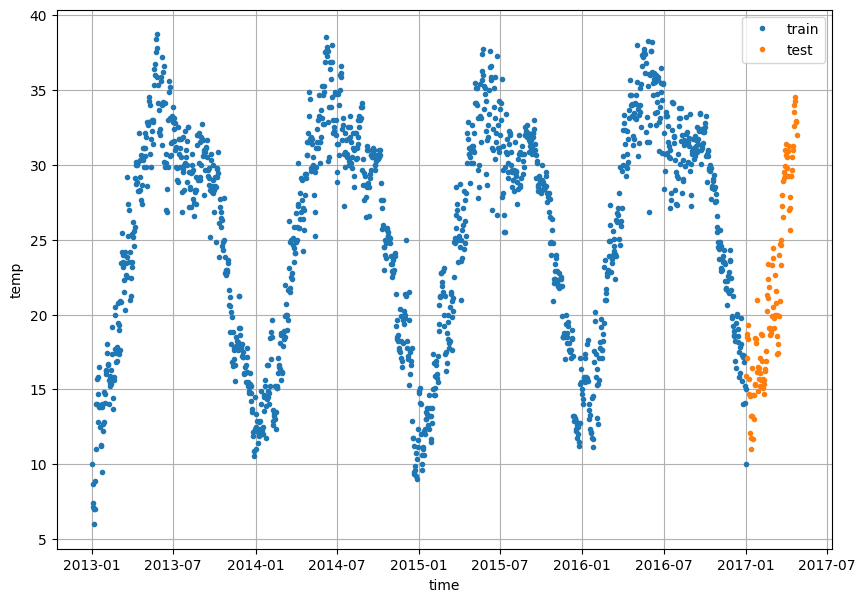

In [ ]:
plt.figure(figsize=[10,7])
plot_time_series(start=0,end=None,x=train_time,y = train_temp,format  = ".",label = "train")
plot_time_series(start=0,end=None,x=test_time,y = test_temp,format  = ".",label = "test")

In [ ]:
naive_forecast = test_temp[:-1]

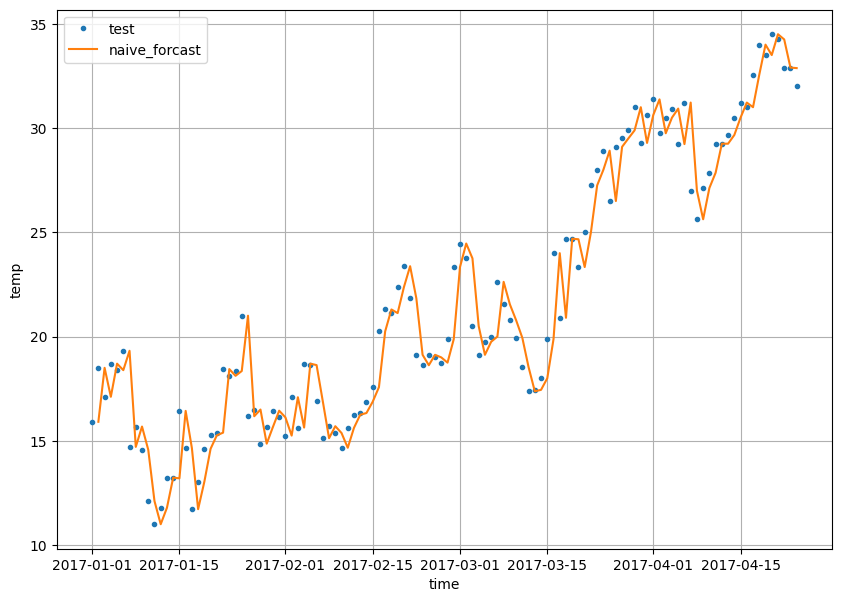

In [ ]:
plt.figure(figsize=[10,7])
plot_time_series(start=0,end=None,x=test_time,y = test_temp,format  = ".",label = "test")
plot_time_series(start=0,end=None,x=test_time[1:],y = naive_forecast,format  = "-",label = "naive_forcast")

In [ ]:
def mase(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  naive_mae = tf.keras.metrics.mean_absolute_error(y_true[1:],y_true[:-1])
  return mae/naive_mae

In [ ]:
model_0_mase = mase(test_temp[1:],naive_forecast)
model_0_mase.numpy()

1.0086757

In [ ]:
def window_making(x,window_size = 7,horizon_size=1):
  window_range = np.expand_dims(np.arange(window_size+horizon_size),axis=0)
  window_index = window_range + np.expand_dims(np.arange(len(x)-(window_size+horizon_size-1)),axis=0).T
  window_value = x[window_index]
  return window_value[:,:-horizon_size],window_value[:,-horizon_size:]

In [ ]:
train_window,train_horizon = window_making(train_temp.to_numpy())

In [ ]:
test_window,test_horizon = window_making(test_temp.to_numpy())

In [ ]:
train_window[:10],train_horizon

(array([[10.        ,  7.4       ,  7.16666667,  8.66666667,  6.        ,
          7.        ,  7.        ],
        [ 7.4       ,  7.16666667,  8.66666667,  6.        ,  7.        ,
          7.        ,  8.85714286],
        [ 7.16666667,  8.66666667,  6.        ,  7.        ,  7.        ,
          8.85714286, 14.        ],
        [ 8.66666667,  6.        ,  7.        ,  7.        ,  8.85714286,
         14.        , 11.        ],
        [ 6.        ,  7.        ,  7.        ,  8.85714286, 14.        ,
         11.        , 15.71428571],
        [ 7.        ,  7.        ,  8.85714286, 14.        , 11.        ,
         15.71428571, 14.        ],
        [ 7.        ,  8.85714286, 14.        , 11.        , 15.71428571,
         14.        , 15.83333333],
        [ 8.85714286, 14.        , 11.        , 15.71428571, 14.        ,
         15.83333333, 12.83333333],
        [14.        , 11.        , 15.71428571, 14.        , 15.83333333,
         12.83333333, 14.71428571],
        [1

In [ ]:
dir = "checkpoint.ckpt"

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear"),
])

model_1.compile(loss = "mae",
                optimizer = "adam"
                )

his_1 = model_1.fit(train_window,train_horizon,
                    epochs=  100,
                    validation_data = [test_window,test_horizon],
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = "checkpoint.ckpt/model_1",
                                                                  save_best_only = True
                                                                  )
                    )

Epoch 1/100
46/46 [==============================] - 5s 42ms/step - loss: 3.8201 - val_loss: 1.7265
Epoch 2/100
46/46 [==============================] - 2s 35ms/step - loss: 1.4547 - val_loss: 1.4256
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 1.2866 - val_loss: 1.4374
Epoch 4/100
46/46 [==============================] - 1s 11ms/step - loss: 1.3019 - val_loss: 1.6015
Epoch 5/100
46/46 [==============================] - 2s 43ms/step - loss: 1.3583 - val_loss: 1.3632
Epoch 6/100
46/46 [==============================] - 2s 33ms/step - loss: 1.2886 - val_loss: 1.3546
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 1.2440 - val_loss: 1.3946
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 1.2465 - val_loss: 1.4018
Epoch 9/100
46/46 [==============================] - 1s 31ms/step - loss: 1.3240 - val_loss: 1.3439
Epoch 10/100
46/46 [==============================] - 0s 7ms/step - loss: 1.2615 - val_loss: 1.3518
Epo

Text(0.5, 0, 'epoch')

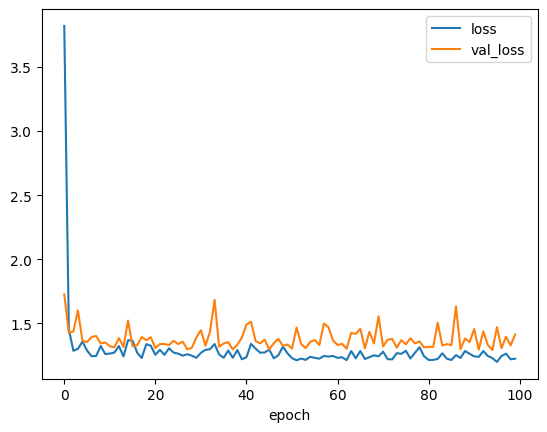

In [ ]:
pd.DataFrame(his_1.history).plot()
plt.xlabel("epoch")

In [ ]:
def evaluation_metrics(y_true,y_pred):
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred,dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mase_ = mase(y_true,y_pred)

  dic = {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mase":mase_.numpy()
  }
  return dic

In [ ]:
model_0_result = evaluation_metrics(tf.squeeze(test_horizon[1:]),tf.squeeze(test_horizon[:-1]))
model_0_result

{'mae': 1.2877529, 'mse': 2.7208033, 'rmse': 1.6494857, 'mase': 0.9987077}

In [ ]:
load_model = tf.keras.models.load_model("/content/checkpoint.ckpt/model_1")

In [ ]:
y_pred_1 = load_model.predict(test_window)

4/4 [==============================] - 0s 2ms/step


In [ ]:
model_1_result = evaluation_metrics(tf.squeeze(test_horizon),tf.squeeze(y_pred_1,))

In [ ]:
model_1_result

{'mae': 1.2923478, 'mse': 2.72166, 'rmse': 1.6497453, 'mase': 1.0035682}

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    tf.keras.layers.Conv1D(64,5,activation = "relu",padding = "causal"),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear")
])

model_2.compile(loss = "mae",
                optimizer = "adam"
                )

his_2 = model_2.fit(train_window,train_horizon,
                    epochs = 100,
                    validation_data = [test_window,test_horizon],
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(dir,"model_2"),
                                                                   save_best_only = True
                                                                   )
                    )

Epoch 1/100
46/46 [==============================] - 3s 28ms/step - loss: 8.0640 - val_loss: 1.7709
Epoch 2/100
46/46 [==============================] - 1s 23ms/step - loss: 1.5157 - val_loss: 1.7429
Epoch 3/100
46/46 [==============================] - 1s 17ms/step - loss: 1.4579 - val_loss: 1.6684
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 1.4233 - val_loss: 1.7468
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 1.4207 - val_loss: 1.7103
Epoch 6/100
46/46 [==============================] - 1s 21ms/step - loss: 1.3936 - val_loss: 1.5977
Epoch 7/100
46/46 [==============================] - 1s 15ms/step - loss: 1.3651 - val_loss: 1.5547
Epoch 8/100
46/46 [==============================] - 1s 16ms/step - loss: 1.3806 - val_loss: 1.4902
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 1.3312 - val_loss: 1.5015
Epoch 10/100
46/46 [==============================] - 1s 15ms/step - loss: 1.3177 - val_loss: 1.4404
Ep

In [ ]:
load_model_2 = tf.keras.models.load_model(os.path.join(dir,"model_2"))

In [ ]:
def pred_eval(model,data,test_label):
  y_pred = model.predict(data)
  model_result = evaluation_metrics(tf.squeeze(test_label),tf.squeeze(y_pred))
  return model_result

In [ ]:
model_2_result = pred_eval(load_model_2,data=  test_window,test_label = test_horizon)
model_2_result

4/4 [==============================] - 0s 10ms/step


{'mae': 1.280704, 'mse': 2.6638668, 'rmse': 1.6321356, 'mase': 0.99452627}

<Axes: >

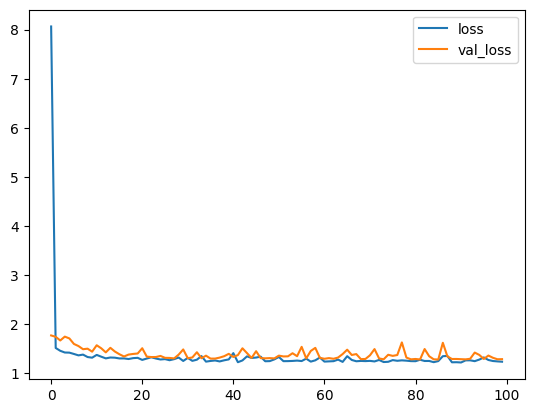

In [ ]:
pd.DataFrame(his_2.history).plot()

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(64,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear")
])

model_3.compile(loss = "mae",
                optimizer = "adam"
                )

his_3 = model_3.fit(train_window,train_horizon,
                    epochs = 100,
                    validation_data = [test_window,test_horizon],
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(dir,"model_3"),
                                                                   save_best_only = True
                                                                   )

                    )

Epoch 1/100
46/46 [==============================] - 8s 127ms/step - loss: 11.7897 - val_loss: 2.0932
Epoch 2/100
46/46 [==============================] - 2s 37ms/step - loss: 1.6591 - val_loss: 1.7052
Epoch 3/100
46/46 [==============================] - 2s 38ms/step - loss: 1.4128 - val_loss: 1.4947
Epoch 4/100
46/46 [==============================] - 2s 37ms/step - loss: 1.3078 - val_loss: 1.3922
Epoch 5/100
46/46 [==============================] - 2s 36ms/step - loss: 1.3051 - val_loss: 1.3637
Epoch 6/100
46/46 [==============================] - 2s 55ms/step - loss: 1.2901 - val_loss: 1.3399
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 1.2625 - val_loss: 1.4098
Epoch 8/100
46/46 [==============================] - 2s 42ms/step - loss: 1.2603 - val_loss: 1.3142
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 1.4098 - val_loss: 1.3358
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 1.2676 - val_loss: 1.3827


In [ ]:
load_model_3 = tf.keras.models.load_model(os.path.join(dir,"model_3"))
model_3_result = pred_eval(load_model_3,test_window,test_horizon)
model_3_result

4/4 [==============================] - 0s 3ms/step


{'mae': 1.2622135, 'mse': 2.6895902, 'rmse': 1.639997, 'mase': 0.98016745}

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(64,return_sequences = True,activation = "relu"),
    tf.keras.layers.LSTM(64,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear")
])

model_4.compile(loss = "mae",
                optimizer = "adam"
                )

his_4 = model_4.fit(train_window,train_horizon,
                    epochs = 100,
                    validation_data = [test_window,test_horizon],
                    callbacks = tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(dir,"model_4"),
                                                                   save_best_only = True
                                                                   )

                    )

Epoch 1/100
46/46 [==============================] - 8s 125ms/step - loss: 11.9311 - val_loss: 2.2153
Epoch 2/100
46/46 [==============================] - 3s 61ms/step - loss: 1.6235 - val_loss: 1.7262
Epoch 3/100
46/46 [==============================] - 3s 60ms/step - loss: 1.4250 - val_loss: 1.5091
Epoch 4/100
46/46 [==============================] - 3s 71ms/step - loss: 1.3415 - val_loss: 1.4729
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 1.3416 - val_loss: 1.5006
Epoch 6/100
46/46 [==============================] - 3s 76ms/step - loss: 1.3641 - val_loss: 1.4110
Epoch 7/100
46/46 [==============================] - 0s 8ms/step - loss: 1.2968 - val_loss: 1.4303
Epoch 8/100
46/46 [==============================] - 0s 8ms/step - loss: 1.3498 - val_loss: 1.4173
Epoch 9/100
46/46 [==============================] - 3s 60ms/step - loss: 1.2935 - val_loss: 1.3732
Epoch 10/100
46/46 [==============================] - 0s 8ms/step - loss: 1.3944 - val_loss: 1.4023


In [ ]:
load_model_4 = tf.keras.models.load_model(os.path.join(dir,"model_4"))
model_4_result = pred_eval(load_model_4,test_window,test_horizon)
model_4_result

4/4 [==============================] - 0s 3ms/step


{'mae': 1.2866747, 'mse': 2.729809, 'rmse': 1.6522133, 'mase': 0.9991628}

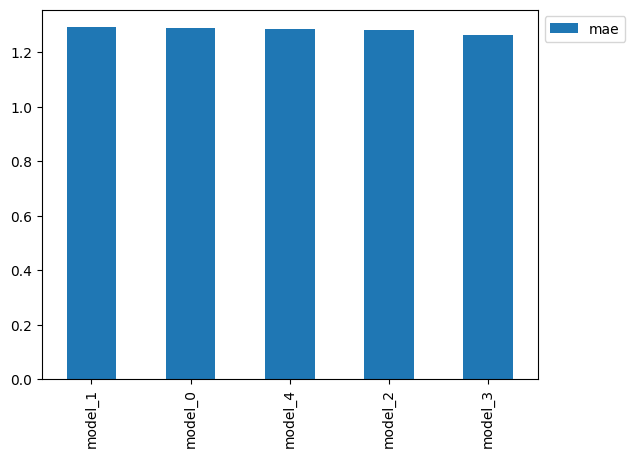

In [ ]:
pd.DataFrame({
    "model_0":model_0_result["mae"],
    "model_1":model_1_result["mae"],
    "model_2":model_2_result["mae"],
    "model_3":model_3_result["mae"],
    "model_4":model_4_result["mae"],
},index = ["mae"]).T.sort_values(by = ["mae"],ascending = False).plot(kind = "bar").legend(bbox_to_anchor=[1,1])

In [ ]:
class N_Beats_Block(tf.keras.layers.Layer):
  def __init__(self,window,horizon,theta,num_layer):
    super().__init__()
    self.window = window,
    self.horizon = horizon
    self.theta = theta,
    self.num_layer = num_layer
    self.hidden = [tf.keras.layers.Dense(128,activation="relu") for _ in range(num_layer)]
    self.theta = tf.keras.layers.Dense(theta,activation = "linear")

  def call(self,input):
    x = input
    for layer in self.hidden:
      x = layer(x)
    output = self.theta(x)
    return output[:,:-self.horizon],output[:,-self.horizon]

In [ ]:
tf.expand_dims(tf.range(7),axis=0)

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [ ]:
n_beats_block_demo = N_Beats_Block(window = 7,horizon=1,theta=8,num_layer=4)
n_beats_block_demo(tf.expand_dims(tf.range(8),axis=0))

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.34434757,  0.46345028, -0.08243605, -0.24247079, -0.31365156,
         -0.266988  ,  0.04710913]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.27587986], dtype=float32)>)

In [ ]:
n_beats_block = N_Beats_Block(window = 7,horizon=1,theta=8,num_layer=4)
input = tf.keras.layers.Input(shape = [7,])
backcast,forecast = n_beats_block(input)
residual = tf.keras.layers.subtract([input,backcast])
for i in range(29):
  backcast,blackcast = N_Beats_Block(window = 7,horizon=1,theta=8,num_layer=4)(residual)
  residual = tf.keras.layers.subtract([residual,backcast])
  forecast = tf.keras.layers.add([forecast,blackcast])

model_5 = tf.keras.Model(inputs = input,
                         outputs = forecast
                         )
model_5.compile(loss = "mae",
                optimizer = "adam"
                )

his_5 = model_5.fit(train_window,train_horizon,
                    epochs = 1000,
                    validation_data = [test_window,test_horizon],
                    callbacks = [
                                 tf.keras.callbacks.EarlyStopping(patience = 200,restore_best_weights = True),
                                 tf.keras.callbacks.ReduceLROnPlateau(patience = 100)
                                 ]
                    )

Epoch 1/1000
46/46 [==============================] - 49s 121ms/step - loss: 6.1154 - val_loss: 1.3989 - lr: 0.0010
Epoch 2/1000
46/46 [==============================] - 3s 61ms/step - loss: 1.5384 - val_loss: 1.4952 - lr: 0.0010
Epoch 3/1000
46/46 [==============================] - 2s 45ms/step - loss: 1.5146 - val_loss: 1.8437 - lr: 0.0010
Epoch 4/1000
46/46 [==============================] - 2s 50ms/step - loss: 1.4328 - val_loss: 1.5145 - lr: 0.0010
Epoch 5/1000
46/46 [==============================] - 3s 61ms/step - loss: 1.3770 - val_loss: 1.5056 - lr: 0.0010
Epoch 6/1000
46/46 [==============================] - 2s 45ms/step - loss: 1.4210 - val_loss: 1.7646 - lr: 0.0010
Epoch 7/1000
46/46 [==============================] - 2s 46ms/step - loss: 1.4606 - val_loss: 1.4815 - lr: 0.0010
Epoch 8/1000
46/46 [==============================] - 2s 45ms/step - loss: 1.2850 - val_loss: 1.6561 - lr: 0.0010
Epoch 9/1000
46/46 [==============================] - 2s 47ms/step - loss: 1.3819 - va

In [ ]:
model_5.evaluate(test_window,test_horizon)

4/4 [==============================] - 0s 11ms/step - loss: 1.2838


1.2838172912597656

In [ ]:
model_5_result = pred_eval(model_5,test_window,test_horizon)

4/4 [==============================] - 1s 9ms/step


In [ ]:
model_5_result

{'mae': 1.2838173, 'mse': 2.7717183, 'rmse': 1.6648479, 'mase': 0.99694383}

In [ ]:
loss_fun = ["mae","mse","mape"]
ensembel_model_ = []
for i in range(10):
  for loss in loss_fun:
    print(f"currently on {loss} function & model number:- {i}")
    ensemble_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    tf.keras.layers.LSTM(64,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear")
    ])

    ensemble_model.compile(loss = loss,
                optimizer = "adam"
                )

    his_ensemble = ensemble_model.fit(train_window,train_horizon,
                    epochs = 1000,
                    verbose = 0,
                    validation_data = [test_window,test_horizon],
                    callbacks = [
                                 tf.keras.callbacks.EarlyStopping(patience = 200,restore_best_weights = True),
                                 tf.keras.callbacks.ReduceLROnPlateau(patience = 100)
                                 ]
                                                                   )
    ensembel_model_.append(ensemble_model)

currently on mae function & model number:- 0


currently on mse function & model number:- 0


currently on mape function & model number:- 0


currently on mae function & model number:- 1


currently on mse function & model number:- 1


currently on mape function & model number:- 1


currently on mae function & model number:- 2


currently on mse function & model number:- 2


currently on mape function & model number:- 2


currently on mae function & model number:- 3


currently on mse function & model number:- 3


currently on mape function & model number:- 3


currently on mae function & model number:- 4


currently on mse function & model number:- 4


currently on mape function & model number:- 4


currently on mae function & model number:- 5


currently on mse function & model number:- 5


currently on mape function & model number:- 5


currently on mae function & model number:- 6


currently on mse function & model number:- 6


currently on mape function & model number:- 6


currently on mae function & model number:- 7


currently on mse function & model number:- 7


currently on mape function & model number:- 7


currently on mae function & model number:- 8


currently on mse function & model number:- 8


currently on mape function & model number:- 8


currently on mae function & model number:- 9


currently on mse function & model number:- 9


currently on mape function & model number:- 9


In [ ]:
ensembel_model_

In [ ]:
ensemble_pred = []
for model in ensembel_model_:
  y_pred_ensemble = model.predict(test_window)
  ensemble_pred.append(y_pred_ensemble)


4/4 [==============================] - 0s 3ms/step


In [ ]:
ensemble_pred = tf.reduce_mean(ensemble_pred,axis=0)

In [ ]:
model_6_result = evaluation_metrics(tf.squeeze(test_horizon),tf.squeeze(ensemble_pred))

In [ ]:
model_6_result

{'mae': 1.2575102, 'mse': 2.6859493, 'rmse': 1.6388866, 'mase': 0.9765152}

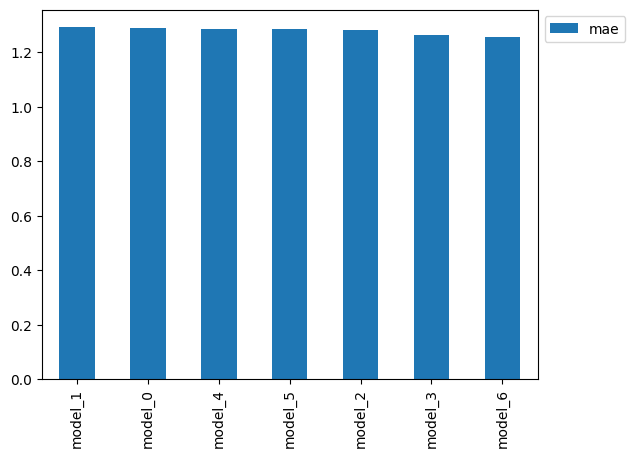

In [ ]:
pd.DataFrame({
    "model_0":model_0_result["mae"],
    "model_1":model_1_result["mae"],
    "model_2":model_2_result["mae"],
    "model_3":model_3_result["mae"],
    "model_4":model_4_result["mae"],
    "model_5":model_5_result["mae"],
    "model_6":model_6_result["mae"],
},index = ["mae"]).T.sort_values(by = ["mae"],ascending = False).plot(kind = "bar").legend(bbox_to_anchor=[1,1])

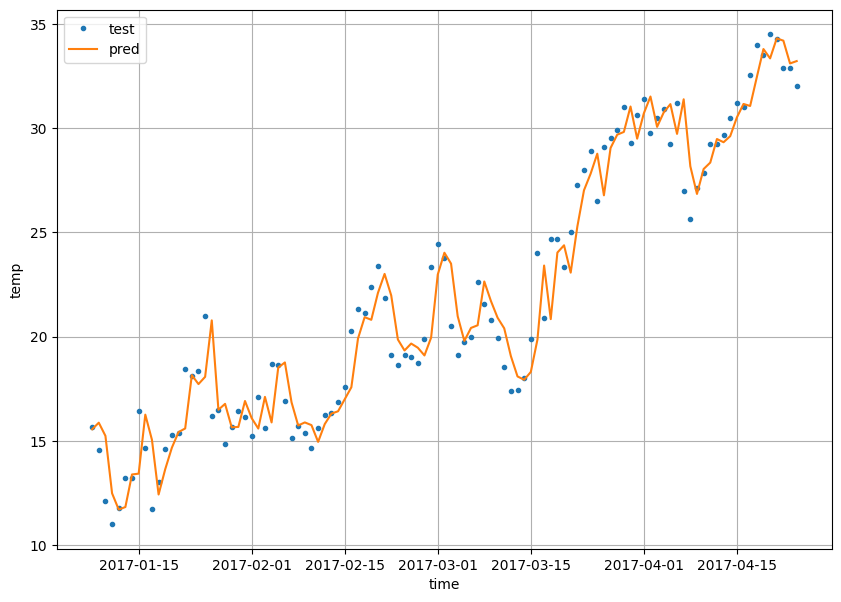

In [ ]:
plt.figure(figsize=[10,7])
# plot_time_series(start = 0,end= None,x = train_time,y = train_temp,format=".",label="train")
plot_time_series(start = -len(ensemble_pred),end= None,x = test_time,y = test_temp,format=".",label="test")
plot_time_series(start = -len(ensemble_pred),end= None,x = test_time,y = ensemble_pred,format="-",label="pred")

In [ ]:
all_temp = np.append(train_temp.to_numpy(),test_temp.to_numpy())

In [ ]:
big_train_window,big_train_horizon = window_making(window_size = 7,horizon_size = 1,x=all_temp)

In [ ]:
all_time = np.append(train_time,test_time)

In [ ]:
big_train_window.shape,big_train_horizon.shape

((1569, 7), (1569, 1))

In [ ]:
model_final_ = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "linear"),
])
model_final_.compile(loss = "mae",
                    optimizer = "adam"
                    )
his_final = model_final_.fit(big_train_window,big_train_horizon,
                            epochs = 100,

                            )

In [ ]:
pd.DataFrame(his_final.history).plot()

In [ ]:
def generate_time(start_date,into_future,ofset = 1):
  start_time = start_date + np.timedelta64(ofset,"D")
  end_time = start_time + np.timedelta64(into_future,"D")
  return np.arange(start_time,end_time,dtype = "datetime64[D]")

In [ ]:
future_time = generate_time(test_time[-1],into_future=14)
future_time

In [ ]:
def future_pred(model,data,into_future = 14):
  input = data
  pred_list = []
  for i in range(into_future):
    predict_value = model.predict(tf.expand_dims(input,axis=0))
    print(f"predicting on {list(input)}\nprediction:- {tf.squeeze(predict_value)}")
    input = np.append(input,predict_value)[1:]
    pred_list.append(tf.squeeze(predict_value))
  return pred_list

In [ ]:
future_prediction = future_pred(model_final_,test_temp[-7:],into_future=14)

In [ ]:
inserted_pred = np.insert(future_prediction,0,test_temp[-1])
inserted_pred,len(inserted_pred)

In [ ]:
inserted_time = np.insert(future_time,0,test_time[-1])

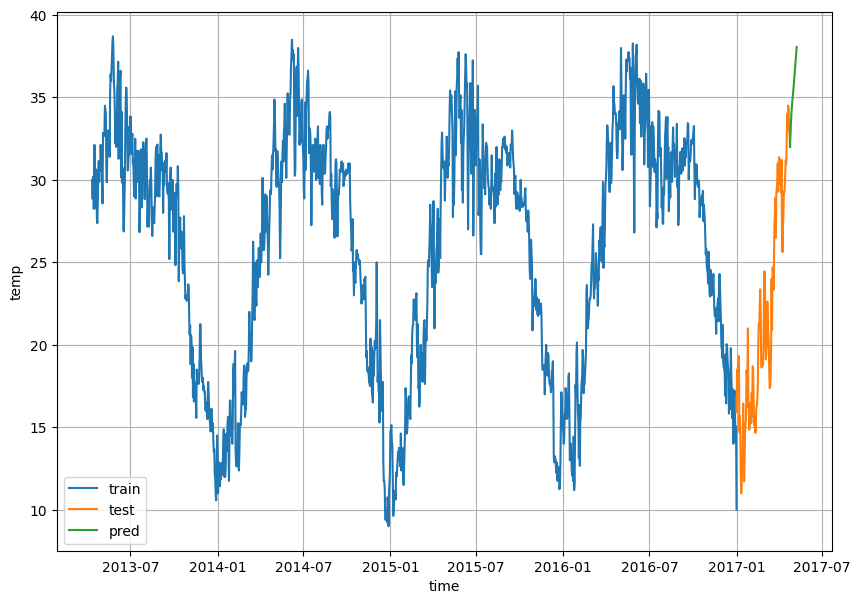

In [ ]:
plt.figure(figsize=[10,7])
plot_time_series(start = 100,end=None,x=train_time,y=train_temp,format="-",label="train")
plot_time_series(start = 0,end=None,x=test_time,y=test_temp,format="-",label="test")
plot_time_series(start = 0,end=None,x=inserted_time,y=inserted_pred,format="-",label="pred")